### Al NMR Figure Generation

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import itertools
import sys
%matplotlib inline

## Import and examine the data

In [24]:
# import the data collected
# This data was organized on a google spreadsheet
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"
# data_path = r"C:\Users\Tyler\Documents\pyluminate/data/al_nmr_data.csv"

AlNMRData = pd.read_csv(data_path)
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature']

### Derivative Column Creation

In [25]:
# Filter off the Cs+ counter ions -- there are only three of them
# AlNMRData = AlNMRData[(AlNMRData.counter_ion != "Cs+")]

#### Aluminum to Hydroxide concentration ratio

In [26]:
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]
AlNMRData['OH_Al_ratio'] = AlNMRData["OH_concentration"] / AlNMRData["Al_concentration"]

#### Creation of colormap columns

In [27]:
# Get a color map
cm = plt.cm.get_cmap('viridis')

OH_cm = cm(AlNMRData["OH_concentration"])

### A look at all the data

In [28]:
AlNMRData.head()
# AlNMRData

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.0,80.45,Na+,25,0.005000,200.0
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0


### Creating a simple example plot

This is for the NWTCC conference...

In [29]:
small_data = AlNMRData[(AlNMRData.Al_concentration == 0.005)]
small_data = small_data[(AlNMRData.counter_ion == 'Na+')]

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


##### How many unique values are present in the Al_concentration column?

In [30]:
small_data

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.00,80.45,Na+,25,0.005000,200.0
1,0.005,5.00,80.40,Na+,25,0.001000,1000.0
2,0.005,7.00,79.59,Na+,25,0.000714,1400.0
3,0.005,11.00,78.13,Na+,25,0.000455,2200.0
4,0.005,13.00,76.93,Na+,25,0.000385,2600.0
5,0.005,17.00,73.64,Na+,25,0.000294,3400.0
6,0.005,19.00,71.80,Na+,25,0.000263,3800.0
92,0.005,2.93,79.82,Na+,25,0.001706,586.0
93,0.005,4.98,79.54,Na+,25,0.001004,996.0
94,0.005,0.93,79.98,Na+,25,0.005376,186.0


$$\require{mhchem}$$

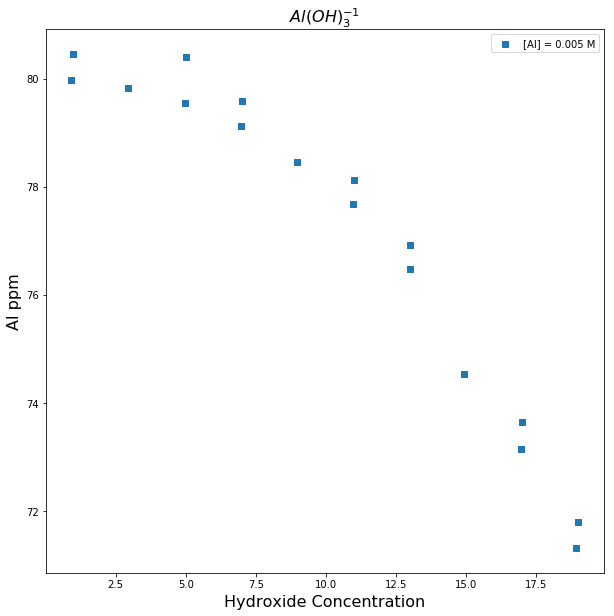

In [31]:
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.scatter(
    x=small_data.OH_concentration,
    y=small_data.Al_ppm,
    label="[Al] = 0.005 M",
    marker=",",
)

plt.ylabel("Al ppm", fontsize=16)
plt.xlabel("Hydroxide Concentration", fontsize=16)
# plt.rc('text', usetex=True)
plt.title(r"$Al(OH)_3^{-1}$ ", fontsize=16)
ax1.legend()

plt.show()

In [43]:
print(AlNMRData.Al_concentration.unique())
print(len(AlNMRData.Al_concentration.unique()))

[  5.00000000e-03   5.00000000e-02   1.00000000e-01   3.96000000e-01
   8.00000000e-01   1.20000000e+00   2.00000000e+00   3.00000000e+00
   5.00000000e-01   1.28000000e+00   6.00000000e+00]
11


## Setup some plotting tools

In [44]:
# Setup a maker iterator
marker = itertools.cycle((',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2', '3', '4'))
marker_list = [',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2']

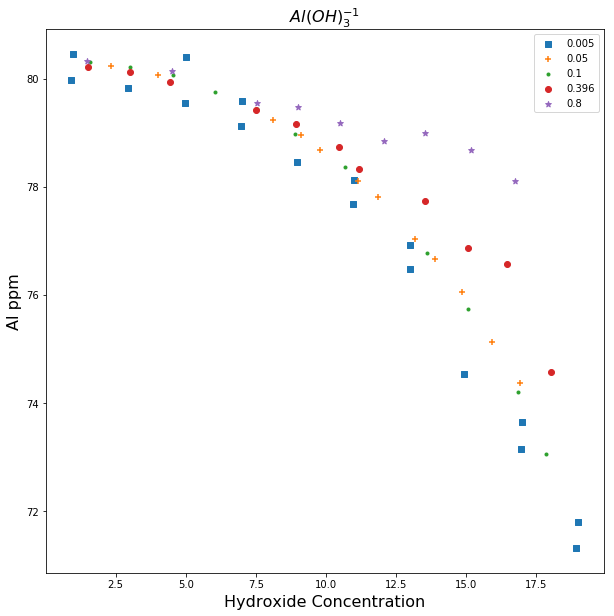

In [50]:
fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.set(xscale="log")

small_data = AlNMRData[(AlNMRData.counter_ion == 'Na+')]

unique_Al_conc = small_data.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc[:5]):

    # Pull out the current bin of Al concentrations.
    curr_Al = small_data[(small_data.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_concentration,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm", fontsize=16)
plt.xlabel("Hydroxide Concentration", fontsize=16)
# plt.rc('text', usetex=True)
plt.title(r"$Al(OH)_3^{-1}$ ", fontsize=16)
ax1.legend()
plt.show()

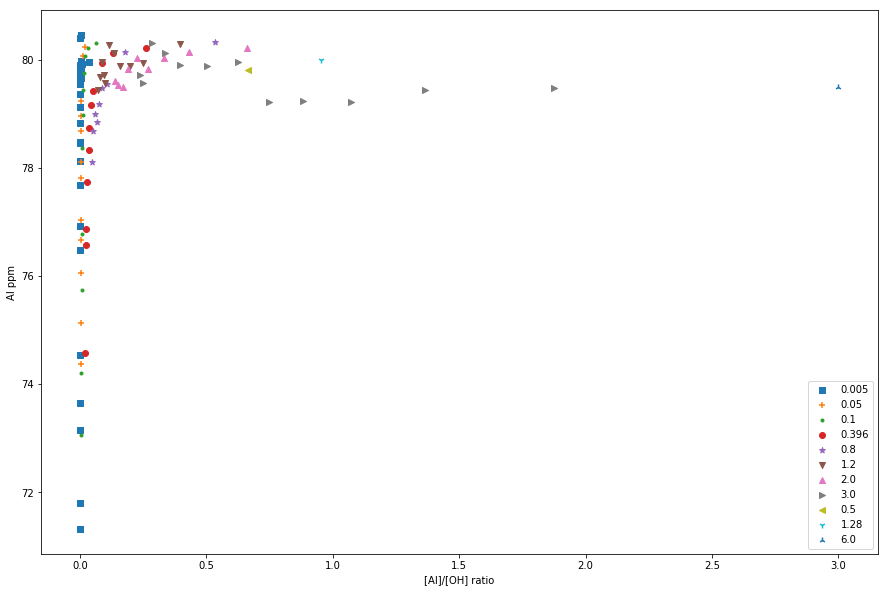

In [81]:
fig1, ax1 = plt.subplots(figsize=(15,10))
# ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
    # Calculate
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax1.legend()
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio")
plt.show()

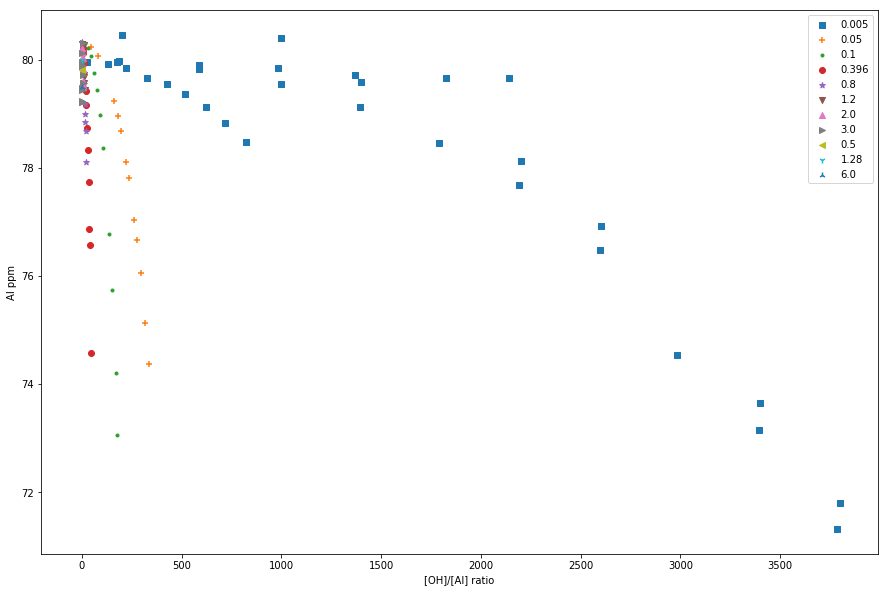

In [15]:
fig1, ax1 = plt.subplots(figsize=(15,10))
unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    

plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio")
ax1.legend()
plt.show()

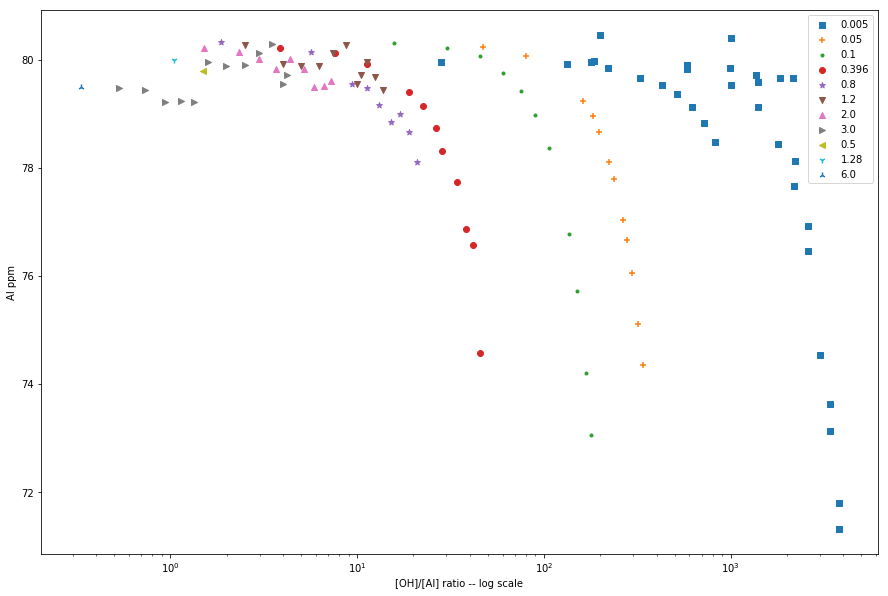

In [25]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio -- log scale")
ax1.legend()
plt.show()

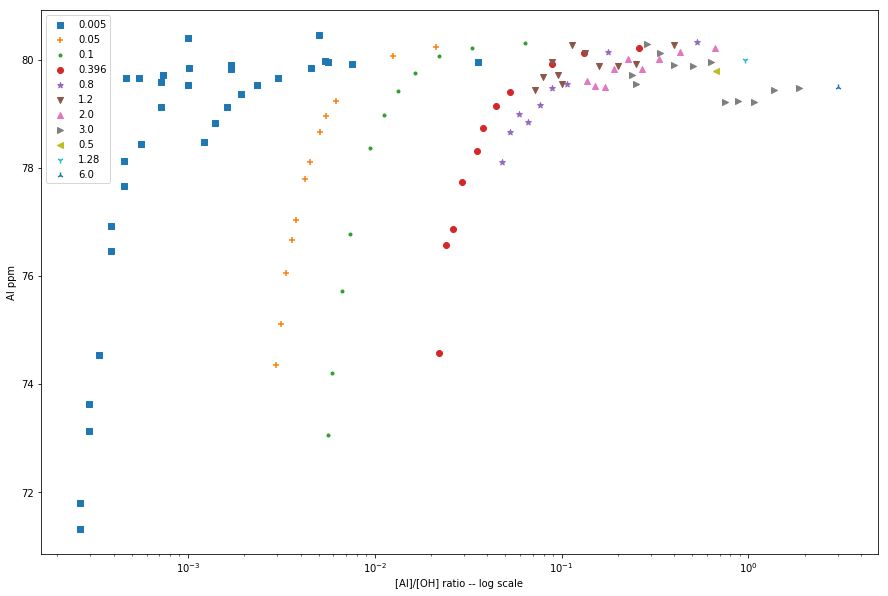

In [26]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio -- log scale")
ax1.legend()
plt.show()

### Interesting pattern observed above. Explore further.

#### Plot linear regressions by aluminum concentration
http://www.statsmodels.org/dev/rlm.html

/home/tylerbiggs/.virtualenvs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


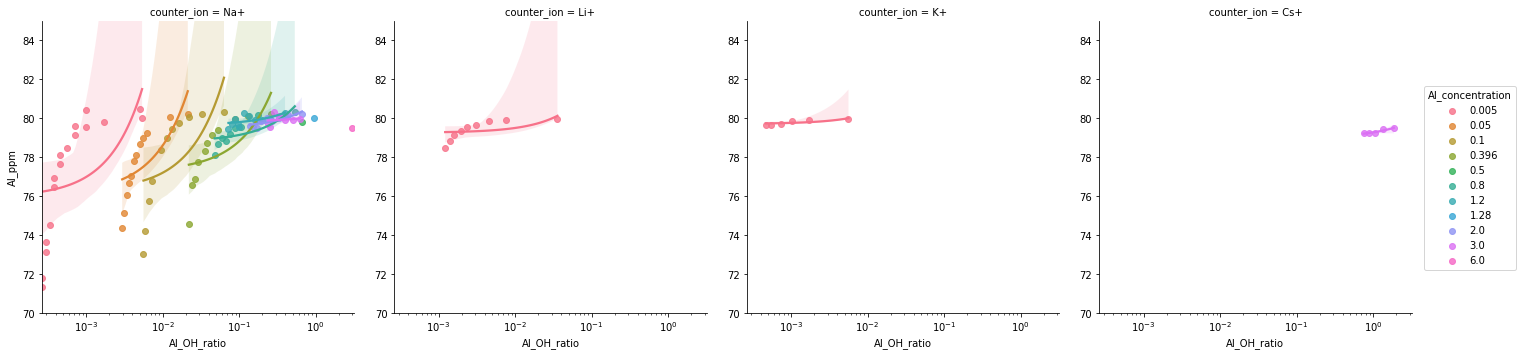

In [15]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
)
g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

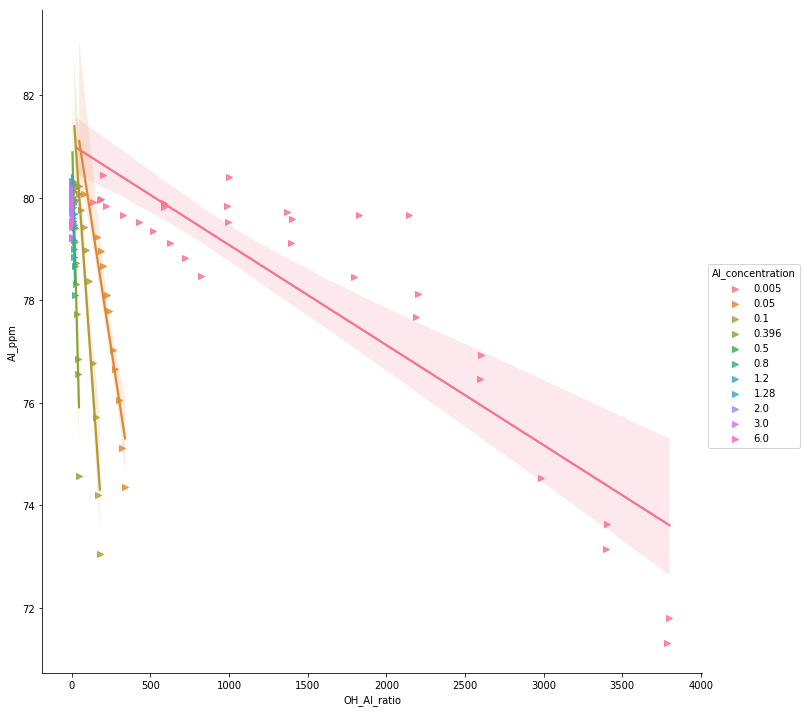

In [33]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    markers=next(marker),
    size=10
#     col="counter_ion",
)
# g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
plt.show()

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


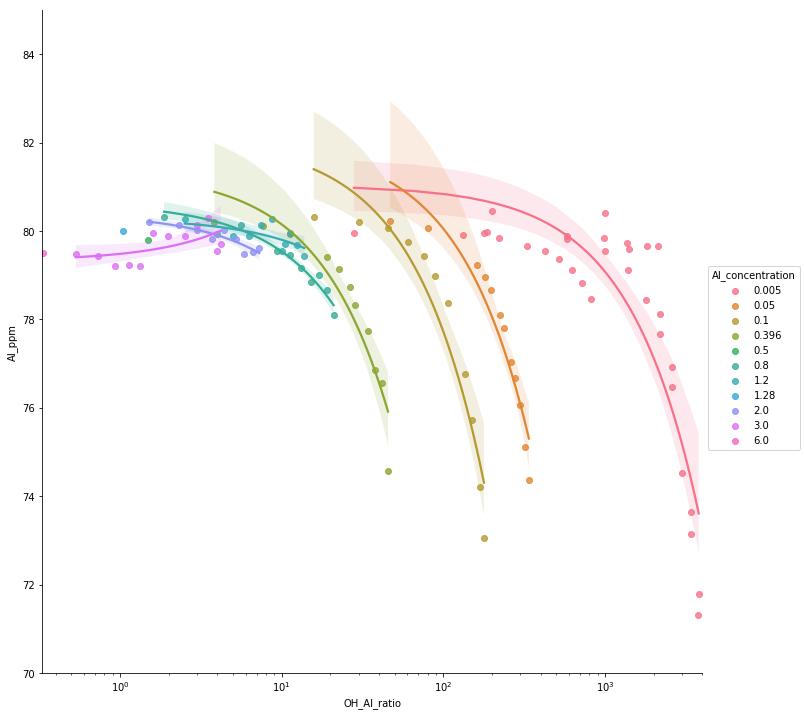

In [32]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    size=10
#     col="counter_ion",
)
g1.set(xscale="log")
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### locally weighted linear regression
A good fit, but I don't see how this is usefull.

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


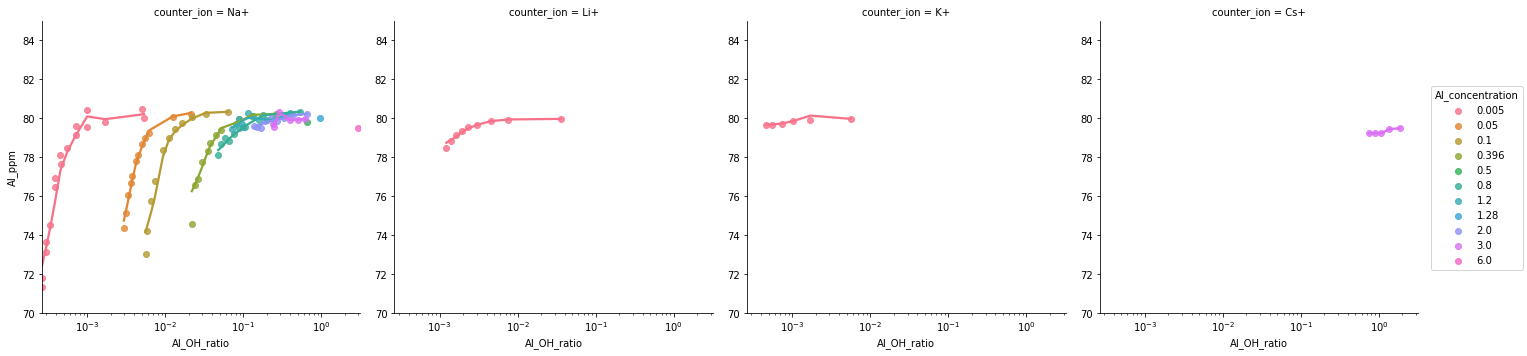

In [18]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    lowess=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### Check different orders of fitting

I tried up to 5, no good fits emereged.

In [22]:
# g1 = sns.lmplot(
#     x="Al_OH_ratio",
#     y="Al_ppm",
#     hue="Al_concentration",
#     data=AlNMRData,
#     truncate=True,
#     col="counter_ion",
#     order=2,
# )
# g1.set(xscale="log")

# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
# plt.show()

#### Robust Regression

Warning!!! Long run time or crahes -- depending on system

In [23]:
# g1 = sns.lmplot(
#     x="Al_OH_ratio",
#     y="Al_ppm",
#     hue="Al_concentration",
#     data=AlNMRData,
#     truncate=True,
#     col="counter_ion",
#     robust=True
# )
# g1.set(xscale="log")

# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
# plt.show()

#### y ~ log(x)
Might be a little better. Still does not depict the data.

C:\Users\Tyler\Anaconda3\envs\python36\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


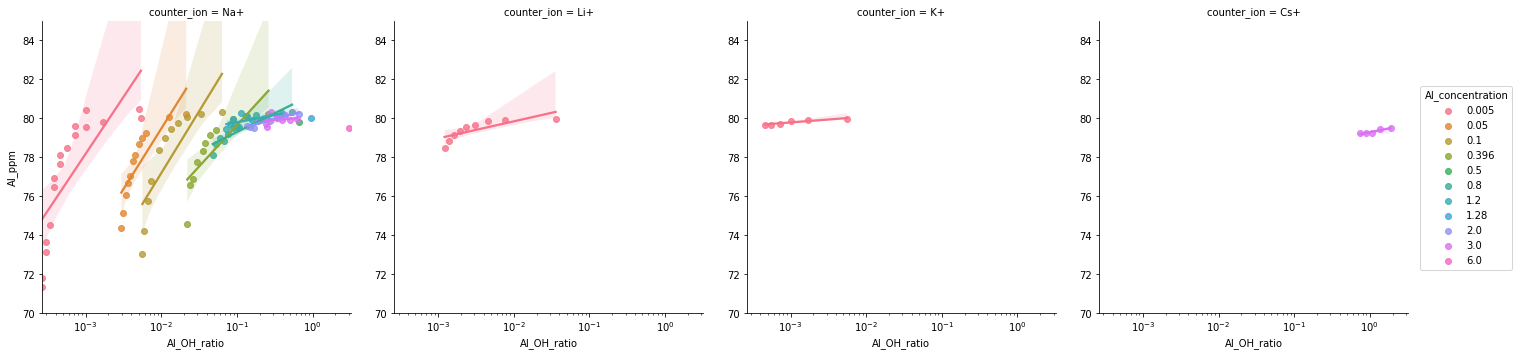

In [25]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    logx=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

Some observartions:

+ All concentrations trend towards the 80 pmm valueas the

### Try to run a linear regression over the entire dataset

In [24]:
# f, ax = plt.subplots(figsize=(15, 8))

# ax.set(xscale="log")

# plt.scatter(
#     x=AlNMRData.Al_OH_ratio,
#     y=AlNMRData.Al_ppm,
#     c=cm(AlNMRData.Al_concentration),
#     s=AlNMRData.OH_concentration*5
# )

# # run a simple linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(AlNMRData.Al_OH_ratio, AlNMRData.Al_ppm)

# plt.plot(AlNMRData.Al_OH_ratio, intercept + slope*AlNMRData.Al_OH_ratio, 'r', label='fitted line')

# # legend = ax.get_legend()
# ax.legend()


# # plt.colorbar()
# plt.show()

### Try on a subset of data

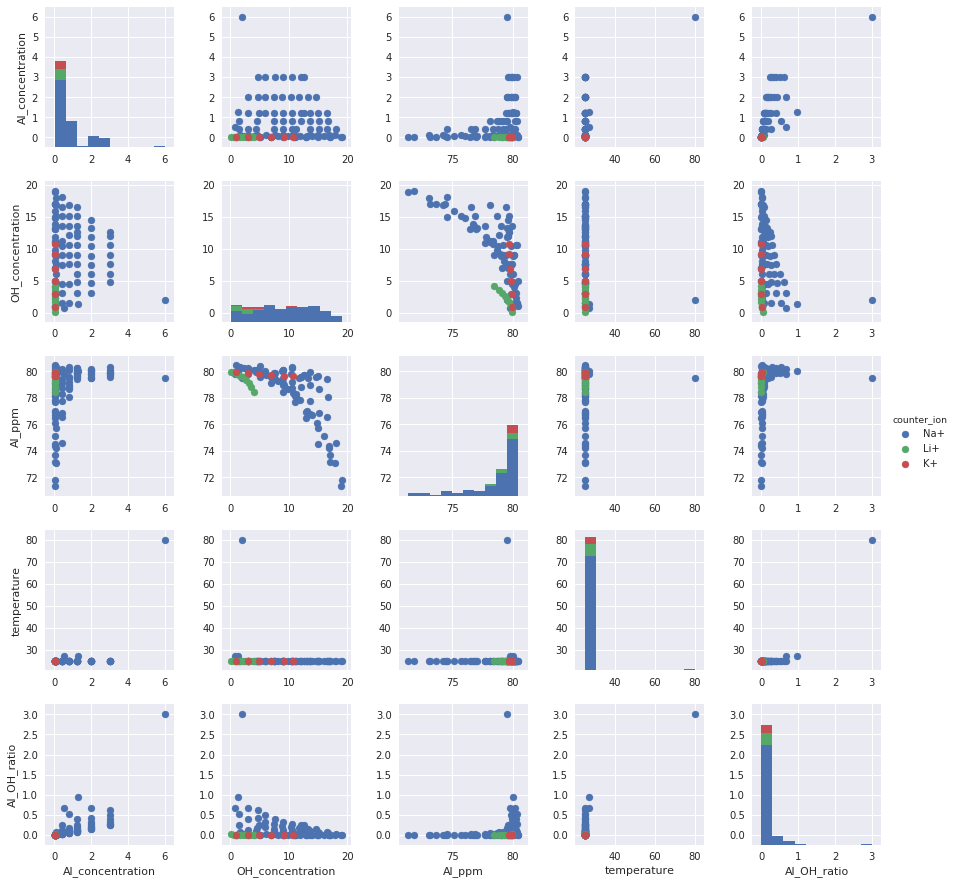

In [58]:
g = sns.PairGrid(AlNMRData, hue="counter_ion")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

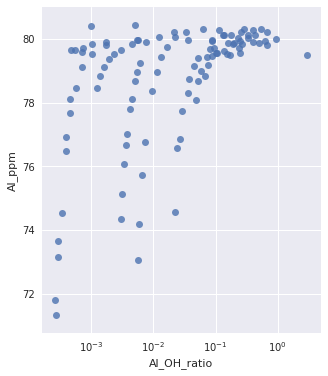

In [38]:
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")

sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    data=AlNMRData,
    ax=ax,
#     hue="Al_concentration",
    fit_reg=False
)

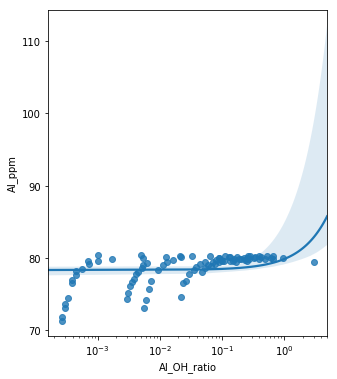

In [35]:
# Setup the figure and axis so that we can control them via the matplotlib interface.
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")


g2 = sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
#     color="Al_concentration",
    ax=ax,
    data=AlNMRData[(AlNMRData.counter_ion == "Na+")],
)

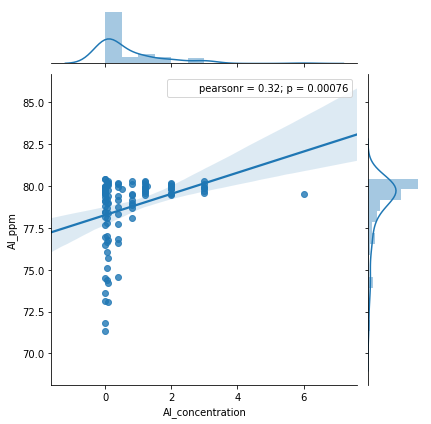

In [36]:
sns.jointplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
#     hue="counter_ion",
    kind="reg",
)

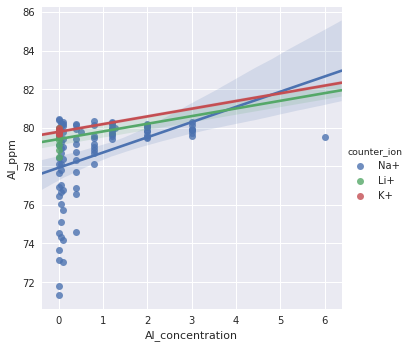

In [37]:
sns.set(style="darkgrid", color_codes=True)

g1 = sns.lmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue="counter_ion"
)

In [27]:
import subprocess

In [68]:
command = subprocess.run(["sum", '/media/tylerbiggs/genomic/test_genomes/candida_glabrata/ASM254v2/candida_glabrata-ASM254v2.fa.gz' 
], stdout=subprocess.PIPE)

In [69]:
outsum, blocks = command.stdout.strip().split()

In [70]:
outsum

b'04038'

In [65]:
outsum == "04038"

True

In [71]:
blocks

b'3785'

In [53]:
command

CompletedProcess(args=['sum', '/media/tylerbiggs/genomic/test_genomes/candida_glabrata/ASM254v2/candida_glabrata-ASM254v2.fa.gz'], returncode=0, stdout=b'04038  3785\n')